In [1]:
import numpy as np
import pandas as pd

# Displaying
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import make_blobs
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise

#Auto-Encoder

Nombre de couche de sortie = Nombre de couche d'entrée

La couche caché est les combinaisons importantes des features d'origines

Cas d'utilisation

- Suppresion du bruit dans les entrées
- Réduction de dimension 

# TP 1 - Réduction de dimensionalité avec mabe_blobs

## 1.Load data

In [2]:
# Load dataset

np.random.seed(seed=101)

data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0, # Quantité de bruit 
                  random_state=101)

print(f"type(data): {type(data)}\nlen(data): {len(data)}\n")

X, y = data

print(f"X.shape: {X.shape}\ny.shape:{y.shape}\n")


## Create noise

z_noise = pd.Series((np.random.normal(size=len(X))))

## Create Dataframe with the real features + noise

df = pd.concat([pd.DataFrame(X), z_noise],axis=1)
df.columns = ['X1','X2','X3']

print(f"DF.shape: {df.shape}")

## Preprocessing

scaler      = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


type(data): <class 'tuple'>
len(data): 2

X.shape: (300, 2)
y.shape:(300,)

DF.shape: (300, 3)


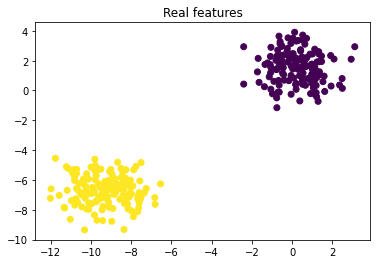

In [3]:
# Visualize the real features

plt.title("Real features")
plt.scatter(df['X1'], df['X2'],c=y)

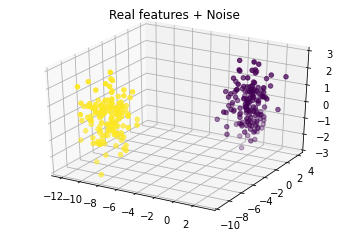

In [4]:
# Visualize the real feature + noise

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

plt.title("Real features + Noise")
ax.scatter(df['X1'], df['X2'], df['X3'],c=y)


# Build the model

3--> 2 --> 3

In [5]:
# Encoder: 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

# Decoer: 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

# Auto-Encoder: 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Fiting the data

In [6]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.3724
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350


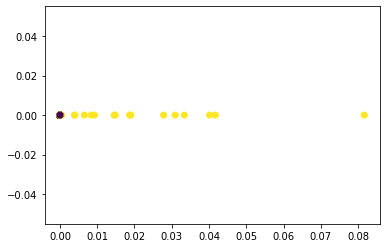

In [7]:
encoded_2dim = encoder.predict(scaled_data)

plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)

## TP 2 - Dimensionality reduction with MNIST

11493376/11490434 [==============================] - 0s 0us/step


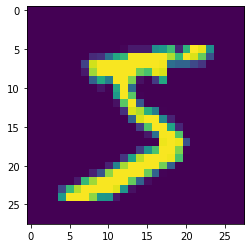

In [8]:
## Load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0])

# Preprocessing

X_train = X_train /255
X_test  = X_test /255

# Build the model

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

decoder = Sequential()
# Decond last layer of the 'encoder'
decoder.add(Dense(50,input_shape=[25],activation='relu')) 
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

autoencoder_mnist = Sequential([encoder, decoder])

autoencoder_mnist.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
autoencoder_mnist.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1678 - accuracy: 0.1842
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1240 - accuracy: 0.2389
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1140 - accuracy: 0.2528
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1084 - accuracy: 0.2619
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1048 - accuracy: 0.2673


In [ ]:
images = autoencoder_mnist.predict(X_test[:10])

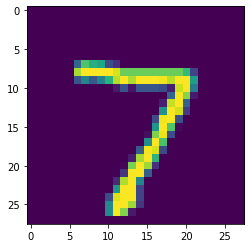

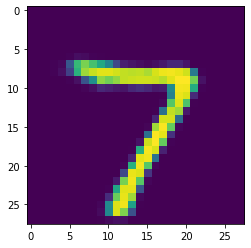

In [ ]:
n = 0

# Display initial image
plt.imshow(X_test[n])
plt.show()

# Display passed image into autoencoder
# <!> Bit blurry
plt.imshow(images[n])

# TP 3 - Denoising

1. Add noise to the input 
2. Train the model with a noised _encoder_
3. Output the image without noise

In [12]:
## Load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing

X_train = X_train /255
X_test  = X_test /255

# Create noise

sample = GaussianNoise(0.2)
noisey = sample(X_test[0:2], training=True)

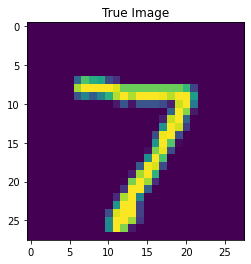

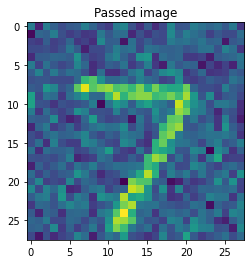

In [11]:
n = 0

# Display initial image
plt.title("True Image")
plt.imshow(X_test[n])
plt.show()

# Display passed image into autoencoder
# <!> Bit blurry
plt.title('Passed image')
plt.imshow(noisey[n])

# Build model

In [13]:
# Créer exactement le même bruit que la formation (facultatif)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Ajouter du bruit aux images avant de passer par l'auto-encodeur
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))


decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

noise_remover = Sequential([encoder, decoder])
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [14]:
noise_remover.fit(X_train, X_train, epochs=8,validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1699 - accuracy: 0.1822 - val_loss: 0.1352 - val_accuracy: 0.2265
Epoch 2/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1282 - accuracy: 0.2335 - val_loss: 0.1209 - val_accuracy: 0.2416
Epoch 3/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1206 - accuracy: 0.2454 - val_loss: 0.1144 - val_accuracy: 0.2498
Epoch 4/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1167 - accuracy: 0.2526 - val_loss: 0.1119 - val_accuracy: 0.2542
Epoch 5/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1130 - accuracy: 0.2600 - val_loss: 0.1087 - val_accuracy: 0.2581
Epoch 6/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1102 - accuracy: 0.2644 - val_loss: 0.1071 - val_accuracy: 0.2675
Epoch 7/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1077 - accuracy: 0.2677 - val_loss: 0.1035 - val_ac

In [15]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

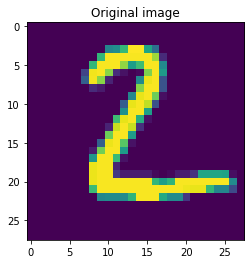

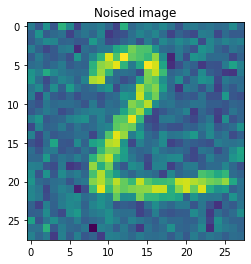

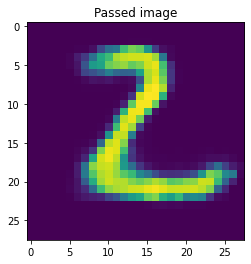

In [16]:
n = 1

plt.title("Original image")
plt.imshow(X_test[n])
plt.show()

plt.title("Noised image")
plt.imshow(ten_noisey_images[n])
plt.show()

plt.title("Passed image")
plt.imshow(denoised[n])
plt.show()